In [ ]:
# Linear regression has assumptions that data it has
'''
1. linearity (can be checked using scatter plot)
2. Multivariate (histogram and fitted normal curve)
2. Normality (Kolmogorov-smirnof test)
3. Little/no multicollinearity (
 Correlation matrix, correlation coeff < 1
 Tolerance, T > 0.1 or T > 0.01
 Variance inflation factor, V = 1/T i.e. V < 10 or < 100
 condition index < 10 or between 10-30
 ) use mean score might help in case of multicollinearity
4. No auto-correlation (use durbin-watson test) 1.5-2.5
5. Homoscidasticity (use scatter plot)
 also check for Goldfeld-Quandt test
 use non-linear correction to fix if found
'''

# How to build a model
'''
1. All-in
2. Backward elimination      \\
3. Forward selection           ==> Stepwise regression
4. Bidirectional elimination //
5. Score comparison
'''

# Backward elimination
'''
1. significance level to stay in model 5%
2. fit the full model with all predictors
3. Consider predictor with hishest p-value
4. remove predictor
5. fit model without this variable
repeat from 3 to 5
until P < significance level
'''

# Forward selection
'''
1. significance level to stay in model 5%
2. fit all simple regression models y-xn, and
select one with lowest P-value
3. Keep this variable and fit all possible models with one
extra predictor added to the one(s) you have
4. consider predictor with lowest p-value
5. if p > sl go to 3, else end
keep previous model and discard current
Model ready
'''

# Bidirectional elimination
'''
1. select significance level, enter = 5%, stay = 5%
2. perform next step of forward selection (p < sl enter)
3. perform all step of backward elimination (p < sl stay)
4. no new variables can endter or old can exit
model ready
'''

# All possible models
'''
1. select a critera of goodness (Akaike criterion)
2. construct all possible regression models: 2n-1
3. select one with best criterion
Model ready
'''

In [5]:
'''
Part 2 - Regression
'''
import mlutil as mu
import matplotlib.pyplot as plt

# fit simple linear regression to the training set
# regressor learns the correlation between input and output
def linear_regression(xt, yt):
    from sklearn.linear_model import LinearRegression
    regressor = LinearRegression()
    regressor.fit(xt,yt)
    return regressor

def regressor_OLS(x, y, cols):
    import statsmodels.formula.api as sm
    x_opt = x[:, cols]
    ols = sm.OLS(endog=y, exog=x_opt).fit()
    return ols

pdir = 'Part 2 - Regression' # parent directory
def backward_elimination(x,y):
    cols = [0,1,2,3,4,5]
    v,i,reg_ols = 1,None,None
    all_regs = []
    while v > 0.05:
        reg_ols = regressor_OLS(x,y,cols)
        i,v = max(enumerate(reg_ols.pvalues),
                  key=lambda x: x[1])
        if v > 0.05:
            del cols[i]
        all_regs.append(reg_ols)
    i,v = max(enumerate(all_regs),
          key=lambda r: r[1].rsquared_adj)
    print(i,v.summary())
    #print(reg_ols.summary())

    # Avoiding the dummy variable trap
def avoid_dummy_var_trap(x, start=1):
    return x[:,start:]

def plot_chart(x, y, xt, yt, t, xl, yl, c1='red', c2='blue'):
    plt.scatter(x, y, color=c1)
    plt.plot(xt, yt, color=c2)
    plt.title(t)
    plt.xlabel(xl)
    plt.ylabel(yl)
    return plt

def multiple_regression():
    fname = pdir + '/Section 5 - Multiple Linear Regression/'
    fname += '50_Startups.csv'
    ox,oy = mu.import_dataset(fname)
    ox,_ = mu.encode_categories(ox, None)
    x = avoid_dummy_var_trap(ox)
    x_train,x_test,y_train,y_test=mu.split(x, oy)
    regressor = linear_regression(x_train, y_train)
    y_pred = regressor.predict(x_test)
    x = np.append(arr=np.ones(shape=(50,1)).astype(int),
                  values=x, axis=1)
    backward_elimination(x,oy)

class PolyReg:
    def __init__(self,x,y,x_grid,poly_reg,lin_reg):
        self.x = x
        self.y = y
        self.xg = x_grid
        self.lin = lin_reg
        self.poly = poly_reg
    def show_plot(self):
        p = plot_chart(self.x,self.y,xt=self.xg,
           yt=self.lin.predict(
               self.poly.fit_transform(self.xg)),
           t='Truth or Bluff (PR)',
           xl='Pos Level',
           yl='Salary')
        p.show()

# Polynomical linear regression
def polynomial_regression(degree):
    fname = pdir + '/Section 6 - Polynomial Regression'
    fname += '/Position_Salaries.csv'
    x,y = mu.import_dataset(fname,xs=1,xe=2)
    from sklearn.preprocessing import PolynomialFeatures
    poly_reg = PolynomialFeatures(degree=degree)
    x_poly = poly_reg.fit_transform(x)
    lin_reg2 = linear_regression(x_poly,y)
    x_grid = np.arange(min(x), max(x), 0.1)
    x_grid = x_grid.reshape(len(x_grid), 1)
    p = PolyReg(x,y,x_grid,poly_reg,lin_reg2)
    p.show_plot()
    return None

def support_vector_regression():
    fname = pdir + '/Section 7 - Support Vector Regression (SVR)'
    fname += '/Position_Salaries.csv'
    x,y = mu.import_dataset(fname, xs=1, xe=2)
    from sklearn.preprocessing import StandardScaler
    sc_x, sc_y = StandardScaler(), StandardScaler()
    x, y = sc_x.fit_transform(x), sc_y.fit_transform(y)
    from sklearn.svm import SVR
    reg = SVR(kernel='rbf')
    reg.fit(x, y)
    xg = np.arange(min(x), max(x), 0.1)
    xg = xg.reshape(len(xg), 1)
    plot_chart(x, y, xt=xg, yt=reg.predict(xg),
               t='Truth or Bluff (PR)',
               xl='Pos Level',
               yl='Salary').show()
    find_for = sc_x.transform(np.array([[6.5]]))
    y_pred = reg.predict(find_for)
    y_pred = sc_y.inverse_transform(y_pred)
    print('Salary for 6.5 = ' + str(y_pred))
    return None

def decision_tree_regression():
    fname = pdir + '/Section 8 - Decision Tree Regression'
    fname += '/Position_Salaries.csv'
    x,y = mu.import_dataset(fname, xs=1, xe=2)
    from sklearn.tree import DecisionTreeRegressor
    reg = DecisionTreeRegressor(random_state=0)
    reg.fit(x,y)
    xg = np.arange(min(x), max(x), 0.01)
    xg = xg.reshape(len(xg), 1)
    plot_chart(x, y, xt=xg, yt=reg.predict(xg),
               t='Truth or Bluff (DTR)',
               xl='Pos Level',
               yl='Salary').show()
    print('Salary for 6.5 = ' + str(reg.predict(6.5)))
    return None

def random_forest_regression(no_trees):
    fname = pdir + '/Section 9 - Random Forest Regression'
    fname += '/Position_Salaries.csv'
    x,y = mu.import_dataset(fname, xs=1, xe=2)
    from sklearn.ensemble import RandomForestRegressor
    reg = RandomForestRegressor(n_estimators=no_trees,
                                random_state=0)
    reg.fit(x,y)
    xg = np.arange(min(x), max(x), 0.01)
    xg = xg.reshape(len(xg), 1)
    plot_chart(x, y, xt=xg, yt=reg.predict(xg),
               t='Truth or Bluff (DTR)',
               xl='Pos Level',
               yl='Salary').show()
    print('Salary for 6.5 = ' + str(reg.predict(6.5)))
    return None


[1 3 2 1 2 1 1 3 2 2 3 3 1 2 3 2 1 1 2 1 2 1 1 2 2 2 2 2 2 3 1 1 2 1 1 1]


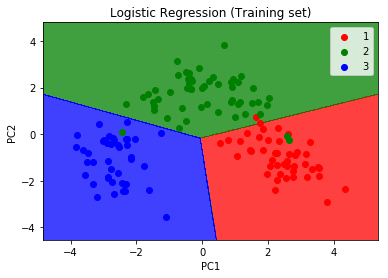

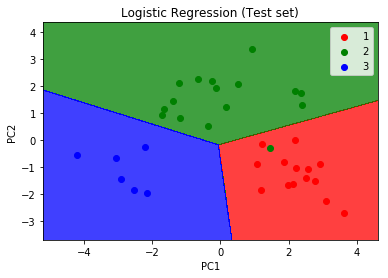

In [8]:
multiple_regression()
polynomial_regression(degree=3)
support_vector_regression()
decision_tree_regression()
random_forest_regression(no_trees=5)